# Alternative Python libraries for Data Science

In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# List files available
print(os.listdir('data'))

['titanic.csv']


<div class="alert alert-block alert-info">
<h1> dabl(Data Analysis Baseline Library)</h1></div>


**dabl** has been created by [Andreas Mueller](https://amueller.github.io/) and it tries to help make supervised machine learning more accessible for beginners, and reduce boiler plate for common tasks. Dabl takes inspirations from scikit-learn and auto-sklearn. Refer to the official [website](https://amueller.github.io/dabl/dev/index.html) for more info.



In [9]:
# Installing and loading the library
!pip install dabl -q

import dabl

### Automated Preprocessing with dabl

As part of the preprocessing,  dabl will attempt to identify missing values, feature types and erroneous data. if the detection of semantic types (continuous, categorical, ordinal, text, etc) fails, the user can provide `type_hints`. Let's demo the library with the help of the titanic dataset.

In [13]:
titanic_df = pd.read_csv('data/titanic.csv')

# A first look at data
titanic_df.shape

(891, 12)

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_df_clean = dabl.clean(titanic_df, verbose=1)


Detected feature types:
2 float, 5 int, 5 object, 0 date, 0 other
Interpreted as:
continuous      2
dirty_float     0
low_card_int    2
categorical     4
date            0
free_string     3
useless         1
dtype: int64


In [20]:
types = dabl.detect_types(titanic_df_clean)
print(types) 

          continuous  dirty_float  low_card_int  categorical   date  \
Survived       False        False         False         True  False   
Pclass         False        False         False         True  False   
Name           False        False         False        False  False   
Sex            False        False         False         True  False   
Age             True        False         False        False  False   
SibSp          False        False          True        False  False   
Parch          False        False          True        False  False   
Ticket         False        False         False        False  False   
Fare            True        False         False        False  False   
Cabin          False        False         False        False  False   
Embarked       False        False         False         True  False   

          free_string  useless  
Survived        False    False  
Pclass          False    False  
Name             True    False  
Sex            

### Exploratory Data analysis with dabl

dabl provides a high-level interface that summarizes several common high-level plots. For low dimensional datasets, all features are shown; for high dimensional datasets, only the most informative features for the given task are shown

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


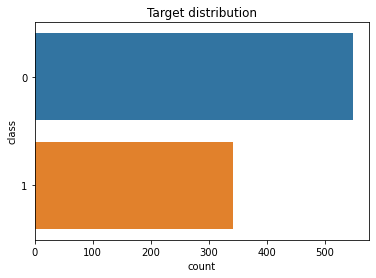

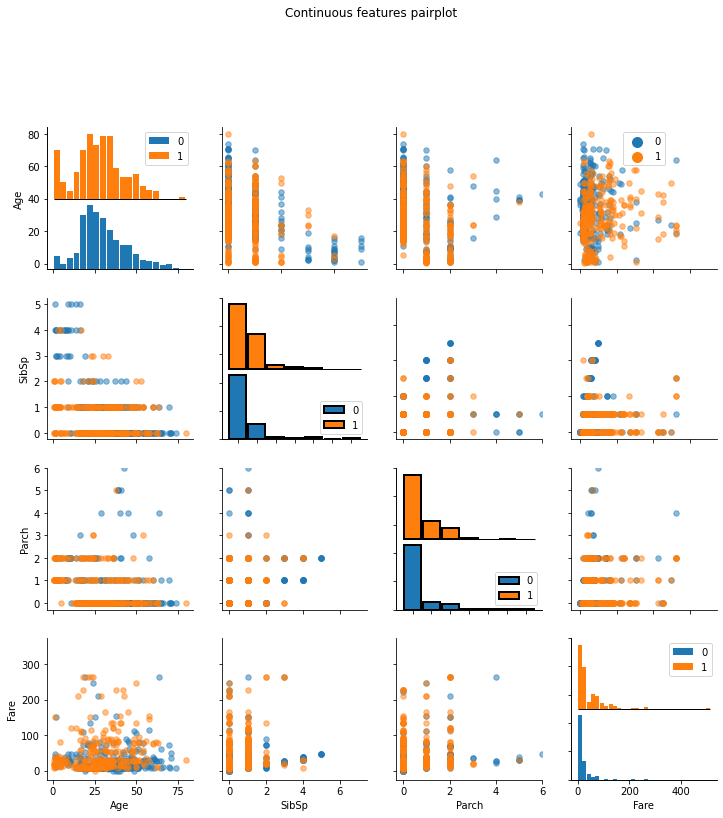

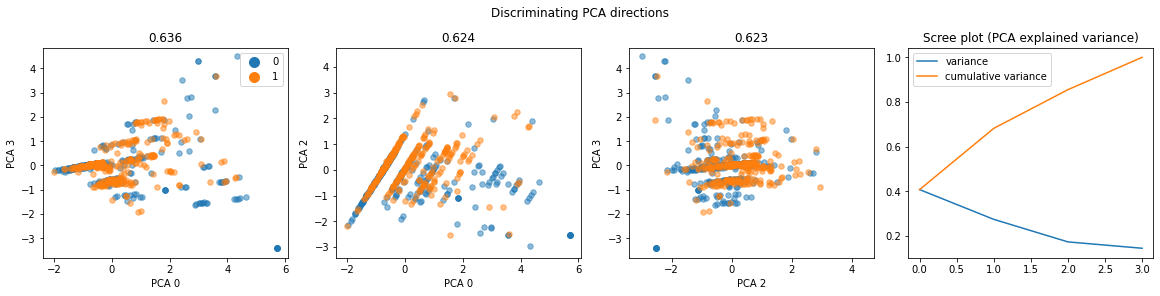

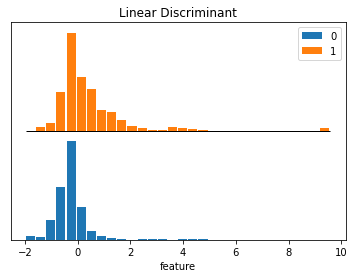

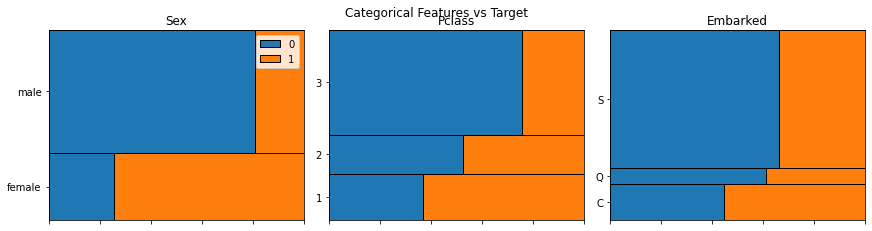

In [21]:
dabl.plot(titanic_df, target_col="Survived")

### Initial Model Building with dabl
We can find an initial model for our data. The SimpleClassifier implements the familiar scikit-learn API of fit and predict.

In [22]:
ec = dabl.SimpleClassifier(random_state=0).fit(titanic_df, target_col="Survived") 

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354
=== new best GaussianNB() (using recall_macro):
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354

Running MultinomialNB()
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.632 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.771
=== new best DecisionTreeClas

The SimpleClassifier first tries several baseline and instantaneous models, potentially on subsampled data, to get an idea of what a low baseline should be.

<div class="alert alert-block alert-info">
<h1> Emot</h1> </div>


[Emot](https://github.com/NeelShah18/emot) is an Emoji and Emoticons detection package for Python. It can come in real handy when we have to preprocess our text data to get rid of the emoticons.

In [23]:
# installation and importing the library
!pip install emot -q
import emot

In [24]:
text = "The weather is ☁️, we might need to carry our ☂️ :("
emot.emoji(text)

{'value': ['☁', '☂'],
 'mean': [':cloud:', ':umbrella:'],
 'location': [[15, 15], [46, 46]],
 'flag': True}

In [25]:
emot.emoticons(text)

{'value': [':('],
 'location': [[49, 51]],
 'mean': ['Frown, sad, andry or pouting'],
 'flag': True}

<div class="alert alert-block alert-info">
<h1>Flashtext</h1> </div>


[Flastext](https://github.com/vi3k6i5/flashtext) lets you extract Keywords from sentence or Replace keywords in sentences.It is based on the [FlashText algorithm](https://arxiv.org/abs/1711.00046) and is considerably faster than Regular Expressions for NLP tasks.

In [27]:
# installation and importing the library
!pip install flashtext -q
from flashtext import KeywordProcessor

The dataset is from the competition : [Real or Not? NLP with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started) where our job is to create a ML model to predict whether the test set tweets belong to a disaster or not, in the form of 1 or 0.This is a classic case of a Binary Classification problem.

In [29]:
twitter_df =  pd.read_csv('data/tweets.csv')
twitter_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Lets create a corpus of all the tweets in the training set

In [30]:
corpus = ', '.join(twitter_df.text)
corpus[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, Forest fire near La Ronge Sask. Canada, All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected, 13,000 people receive #wildfires evacuation orders in California , Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school , #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires, #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas, I'm on top of the hill and I can see a fire in the woods..., There's an emergency evacuation happening now in the building across the street, I'm afraid that the tornado is coming to our area..., Three people died from the heat wave so far, Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding, #raining #flood

### Extract Keywords or searching for words in a corpus

In [31]:
# How many times does the word 'flood' appear in the corpus?
processor = KeywordProcessor()
processor.add_keyword('flood')
found = processor.extract_keywords(corpus)
print(len(found))
  

58


###  Replacing words in a text document

In [34]:
# Replacing all occurences of word 'forest fire'(case insensitive) with fire

processor = KeywordProcessor(case_sensitive = False)
processor.add_keyword('forest fire','fire')
found = processor.replace_keywords(corpus)
print(found[:250])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, fire near La Ronge Sask. Canada, All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected, 13,000 peop


The word `Forest Fire` gets replaced with only fire. In the same way we could also replace special characters, hyperlinks etc from a document.

<div class="alert alert-block alert-info">
<h1>SweetViz</h1> </div>

[Sweetviz](https://github.com/fbdesignpro/sweetviz) is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. Output is a fully self-contained HTML application.
The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

* Target analysis
* Visualize and compare
* Mixed-type associations

Type inference: automatically detects numerical, categorical, and text features, with optional manual overrides, and a lot more

Let us see it demo through the Titanic Dataset

In [53]:
# Installing the library
!pip install sweetviz -q

In [54]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(titanic_df)
#display the report
advert_report.show_html('Titanic.html')


Report Titanic.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<div class="alert alert-block alert-info">
<h1>Numerizer</h1> </div>

[Numerizer](https://github.com/jaidevd/numerizer) is a Python module for converting natural language numbers into ints and floats. It is a port of the Ruby gem [numerizer](https://github.com/jduff/numerizer). This could be really useful when preprocessing text data.

In [62]:
!pip install numerizer -q

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [55]:
from numerizer import numerize
numerize('forty two')


'42'

In [56]:
numerize('forty-two')

'42'

In [57]:
numerize('four hundred and sixty two')

'462'

In [58]:
numerize('twenty one thousand four hundred and seventy three')

'21473'

In [59]:
numerize('one billion and one')

'1000000001'

In [60]:
numerize('nine and three quarters')

'9.75'

In [61]:
numerize('platform nine and three quarters')

'platform 9.75'

These were some of the interesting and  useful python libraries for data science, that I have come across recently. In case you know about others which can be added to the list, do mention them in the comments below. 